In [15]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [16]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [17]:
# Se importan los datos del archivo
dataframe = pd.read_csv('usuarios_win_mac_lin.csv')

In [18]:
# Se visualizan los 5 primeros registros
dataframe.head(5)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [19]:
# Se visualiza la información de los datos
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [20]:
# Se visualizan los usuarios por clase
#Clase 0 = Windows
#Clase 1 = Mac
#Clase 2 = Linux
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


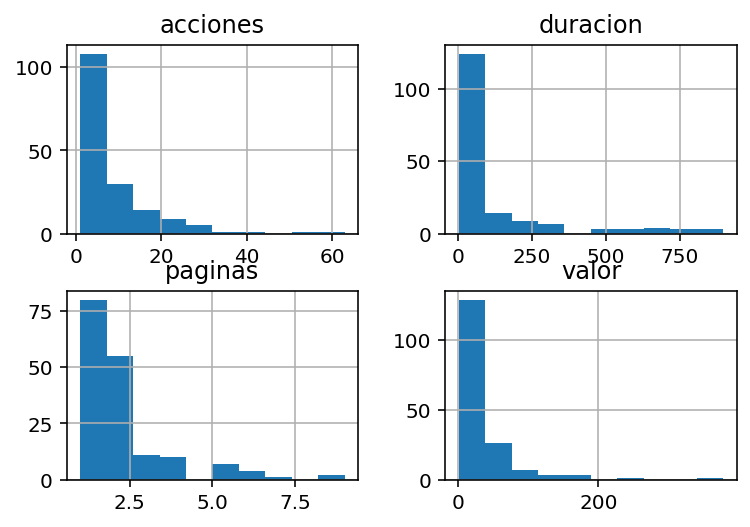

In [21]:
# Se muestran los datos en formato de historial
dataframe.drop(['clase'],1).hist()
plt.show()

In [22]:
# Se excluye la columna clase de la variable x (independiente)
x = np.array(dataframe.drop(['clase'],1))
# Se agrega la columna clase en la variable y (variable objetivo)
y = np.array(dataframe['clase'])
# Se comprueba la dimensión de la matriz
x.shape

(170, 4)

In [29]:
# Separando el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30)

In [30]:
# Se define el Modelo de Clasificación (Regresión Logística)
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression()

In [31]:
# Se entrena el modelo
modelo.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Se realiza la predicción
prediccion = modelo.predict(x_train)
prediccion

array([0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 2])

In [43]:
# Se retorna el coeficiente de determinación R^2 de la predicción con las variables de entrenamiento
modelo.score(x_train,y_train)

0.7815126050420168

In [44]:
# Se retorna el coeficiente de determinación R^2 de la predicción con las variables de prueba
modelo.score(x_test,y_test)

0.7450980392156863

In [50]:
# Se procede a realizar la evaluación del modelo
prediccion1= modelo.predict(x_test)
print(classification_report(y_test, prediccion1))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.80      0.36      0.50        11
           2       0.72      1.00      0.84        13

    accuracy                           0.75        51
   macro avg       0.76      0.71      0.70        51
weighted avg       0.75      0.75      0.73        51



In [49]:
# Reporte de resultados del modelo
print(confusion_matrix(y_test, prediccion1))

[[21  1  5]
 [ 7  4  0]
 [ 0  0 13]]


In [53]:
# Clasificación (o prediccióon) de nuevos valores

# Tiempo Duración: 15
# Paginas visitadas: 4
# Acciones al navegar: 5
# Valoracion: 8

x_new = pd.DataFrame({'duracion': [15], 'paginas': [4], 'acciones': [5], 'valor': [8]})
modelo.predict(x_new)

#Se visualiza la predicción y este lo clasifica como usuario de clase 2: Linux

array([2])